# Part I
## Task II 

Generating Datasets

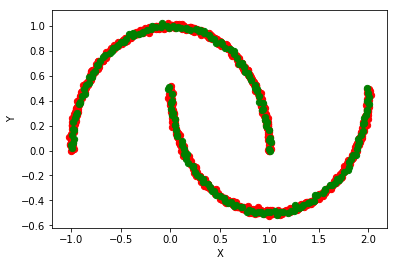

<Figure size 432x288 with 0 Axes>

In [4]:
import sklearn.datasets as skd
import numpy as np
import matplotlib.pyplot as plt
dataSet, labels = skd.make_moons(1000, noise = 0.01)
testDataSet, testLabels = skd.make_moons(200, noise = 0.01)

plt.scatter(dataSet[:, 0], dataSet[:, 1], s = 40, color ={'r'}) 
plt.scatter(testDataSet[:, 0], testDataSet[:, 1], s = 40, color ={'g'}) 
plt.xlabel("X") 
plt.ylabel("Y") 
plt.show() 
plt.clf() 
features = {}
n_features = 2
n = 0
labels_onehot = []
for l in labels:
    x = np.zeros(n_features)
    if(l in features):
        x[features[l]] = 1
    else:
        features[l] = n
        x[features[l]] = 1
        n += 1
    labels_onehot.append(x)

Comparison between PyTorch and Numpy implementation

train


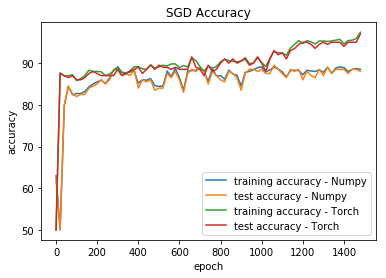

In [5]:
from mlp_numpy import *
from modules import *
from train_mlp_numpy import *
testResult = []
trainResult = []
DNN_HIDDEN_UNITS_DEFAULT = '20'
LEARNING_RATE_DEFAULT = 1e-1
MAX_EPOCHS_DEFAULT = 1500
EVAL_FREQ_DEFAULT = 20
mlp = MLP(2,[20],2)
mlp.lRate = LEARNING_RATE_DEFAULT
CE = CrossEntropy()

for i in range(MAX_EPOCHS_DEFAULT):
    if(i % EVAL_FREQ_DEFAULT == 0):
        correct = 0
        for data, label in zip(testDataSet, testLabels):
            result = mlp.forward(data)
            if(np.argmax(result) == features[label] and result.max() != 0.5):
                correct += 1
        testResult.append(correct*100/len(testDataSet))
        correct = 0
        for data, label in zip(dataSet, labels):
            result = mlp.forward(data)
            if(np.argmax(result) == features[label] and result.max() != 0.5):
                correct += 1
        trainResult.append(correct*100/len(dataSet))
    train(mlp, dataSet, labels_onehot, "SGD")

x = range(0,MAX_EPOCHS_DEFAULT,20)
plt.plot(x, trainResult, label = "training accuracy - Numpy")
plt.plot(x, testResult, label = "test accuracy - Numpy")


from pytorch_mlp import *
from pytorch_train_mlp import *
dataSet = torch.Tensor(dataSet)
labels = torch.Tensor(labels).long()
testDataSet = torch.Tensor(testDataSet)
testLabels = torch.Tensor(testLabels).long()

mlp = torchMLP(2, [20], 2)

ep, acs, acs1 = train(mlp, dataSet, labels, testDataSet, testLabels, MAX_EPOCHS_DEFAULT)
plt.plot(x, acs1, label = "training accuracy - Torch")
plt.plot(x, acs, label = "test accuracy - Torch")

plt.legend(loc="best")

plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("SGD Accuracy")
plt.show()

We can see similar performance of the two implementations. PyTorch version performs better.

## Part III

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=10, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

1.7%